# WeatherPy
----

## Observations

Observation: The % of cloudiness and humidity appear to be more randomly distributed across latitudes compared to Temparature and wind speed which are more closely related along varying latitudes. 

Observation: For northen hemisphere as you move further away from the 0 latitaude the temperature decreases. On the other hand, in the southern hempisphere, as you move closer to 0 latitude, the temperature increases.

Observation: Wind speed has little to no variration across latitudes in teh northen hemisphere. However, it is slightly affected in the southern hemisphere. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output/weather_dataframe.csv"
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Url
base_url = "http://api.openweathermap.org/data/2.5/weather?"

city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# Set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        
        query_url = base_url + "appid=" + weather_api_key + "&q=" + city
        response = requests.get(query_url).json()
                
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 50:
            count_one = 1
            set_one += 1
            city_two.append(city)
           
        else:
            count_one += 1
            city_two.append(city)
            
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\n"
        f"Data Retrieval Complete\n"
        f"-----------------------------\n")    

Processing Record 1 of Set 1 | talnakh
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | saskylakh
Processing Record 4 of Set 1 | ostrovnoy
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | aswan
Processing Record 7 of Set 1 | hatfield
Processing Record 8 of Set 1 | westport
Processing Record 9 of Set 1 | hasaki
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | hilo
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | valentin gomez farias
Processing Record 16 of Set 1 | saint-philippe
Processing Record 17 of Set 1 | malibu
Processing Record 18 of Set 1 | atuona
City not found. Skipping...
Processing Record 19 of Set 1 | chokurdakh
Processing Record 20 of Set 1 | vadso
Processing Record 21 of Set 1 | vaini
Processing Record 22 of Set 1 | carnarvon
Processing Record 23 of Set 1 | cape town
Processing Record 24 of Set 1 | avarua
Pr

Processing Record 41 of Set 4 | laktasi
Processing Record 42 of Set 4 | los llanos de aridane
Processing Record 43 of Set 4 | kaitangata
Processing Record 44 of Set 4 | menongue
Processing Record 45 of Set 4 | darnah
City not found. Skipping...
Processing Record 46 of Set 4 | hervey bay
Processing Record 47 of Set 4 | new norfolk
Processing Record 48 of Set 4 | port hawkesbury
Processing Record 49 of Set 4 | bata
Processing Record 50 of Set 4 | veraval
Processing Record 51 of Set 4 | katherine
Processing Record 1 of Set 5 | nemuro
Processing Record 2 of Set 5 | college
Processing Record 3 of Set 5 | inongo
Processing Record 4 of Set 5 | sao filipe
Processing Record 5 of Set 5 | cauquenes
Processing Record 6 of Set 5 | hambantota
City not found. Skipping...
Processing Record 7 of Set 5 | kjollefjord
Processing Record 8 of Set 5 | humaita
Processing Record 9 of Set 5 | komsomolskiy
Processing Record 10 of Set 5 | syracuse
Processing Record 11 of Set 5 | guerrero negro
Processing Record 1

Processing Record 22 of Set 8 | half moon bay
Processing Record 23 of Set 8 | ati
Processing Record 24 of Set 8 | mora
Processing Record 25 of Set 8 | yagodnoye
Processing Record 26 of Set 8 | sola
Processing Record 27 of Set 8 | saint-joseph
Processing Record 28 of Set 8 | tiznit
Processing Record 29 of Set 8 | kruisfontein
Processing Record 30 of Set 8 | hovd
Processing Record 31 of Set 8 | mandalgovi
Processing Record 32 of Set 8 | rio grande
Processing Record 33 of Set 8 | bukama
Processing Record 34 of Set 8 | thornbury
Processing Record 35 of Set 8 | ketchikan
Processing Record 36 of Set 8 | moundsville
Processing Record 37 of Set 8 | trairi
Processing Record 38 of Set 8 | irbit
Processing Record 39 of Set 8 | brownsville
Processing Record 40 of Set 8 | klaksvik
Processing Record 41 of Set 8 | tongren
Processing Record 42 of Set 8 | sakaiminato
City not found. Skipping...
Processing Record 43 of Set 8 | lucani
Processing Record 44 of Set 8 | trinidad
Processing Record 45 of Set 8

Processing Record 5 of Set 12 | kovernino
Processing Record 6 of Set 12 | zharkent
Processing Record 7 of Set 12 | boa vista
City not found. Skipping...
Processing Record 8 of Set 12 | inhambane
Processing Record 9 of Set 12 | kalangala
Processing Record 10 of Set 12 | sinazongwe
Processing Record 11 of Set 12 | agadez
Processing Record 12 of Set 12 | jetis
Processing Record 13 of Set 12 | keuruu
Processing Record 14 of Set 12 | suntar
Processing Record 15 of Set 12 | pucallpa
Processing Record 16 of Set 12 | sakakah
Processing Record 17 of Set 12 | mazarron
Processing Record 18 of Set 12 | salalah
------------------------------
Data Retrieval Complete
-----------------------------



### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

In [5]:
# establish dataframe
weather_dataframe = pd.DataFrame(weather_dict)

In [6]:
# show the top of the dataframe
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,talnakh,94,RU,1650910725,97,69.4865,88.3972,254.93,1.81
1,bluff,30,NZ,1650910709,66,-46.6000,168.3333,283.60,10.48
2,saskylakh,83,RU,1650910706,100,71.9167,114.0833,250.63,1.71
3,ostrovnoy,100,RU,1650910725,98,68.0531,39.5131,274.33,1.92
4,ushuaia,100,AR,1650910699,67,-54.8000,-68.3000,278.94,1.50


In [7]:
weather_dataframe.count()

City          579
Cloudiness    579
Country       579
Date          579
Humidity      579
Lat           579
Lng           579
Max Temp      579
Wind Speed    579
dtype: int64

In [8]:
# output data to csv
weather_dataframe.to_csv("weather_df.csv")

In [9]:
weather = pd.read_csv("weather_df.csv")
weather_dataframe = pd.DataFrame(weather)
del weather_dataframe["Unnamed: 0"]
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,talnakh,94,RU,1650910725,97,69.4865,88.3972,254.93,1.81
1,bluff,30,NZ,1650910709,66,-46.6000,168.3333,283.60,10.48
2,saskylakh,83,RU,1650910706,100,71.9167,114.0833,250.63,1.71
3,ostrovnoy,100,RU,1650910725,98,68.0531,39.5131,274.33,1.92
4,ushuaia,100,AR,1650910699,67,-54.8000,-68.3000,278.94,1.50


In [10]:
weather_dataframe.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,579.000000,5.790000e+02,579.000000,579.000000,579.000000,579.000000,579.000000
mean,60.756477,1.650911e+09,70.794473,21.047880,15.619344,289.733817,3.672453
std,37.004738,9.209580e+01,21.489377,33.160937,88.556128,12.477911,2.425135
min,0.000000,1.650910e+09,8.000000,-54.800000,-179.166700,250.110000,0.000000
25%,26.000000,1.650911e+09,60.000000,-7.305600,-64.629200,282.460000,1.870000
50%,75.000000,1.650911e+09,75.000000,25.850000,18.423200,292.190000,3.090000
75%,98.000000,1.650911e+09,87.000000,49.805150,91.595250,299.150000,5.110000
max,100.000000,1.650911e+09,100.000000,78.218600,179.316700,315.250000,13.380000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
city_humidity = weather_dataframe[(weather_dataframe["Humidity"]> 100)].index
city_humidity

Int64Index([], dtype='int64')

In [12]:
city_humidity = weather_dataframe.groupby(["Humidity"]).head()
city_humidity.head(5)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,talnakh,94,RU,1650910725,97,69.4865,88.3972,254.93,1.81
1,bluff,30,NZ,1650910709,66,-46.6000,168.3333,283.60,10.48
2,saskylakh,83,RU,1650910706,100,71.9167,114.0833,250.63,1.71
3,ostrovnoy,100,RU,1650910725,98,68.0531,39.5131,274.33,1.92
4,ushuaia,100,AR,1650910699,67,-54.8000,-68.3000,278.94,1.50


In [13]:
#  Get the indices of cities that have humidity over 100%.
above_humidity = pd.DataFrame(city_humidity.loc[city_humidity['Humidity']>100,:])
above_humidity.head(5)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

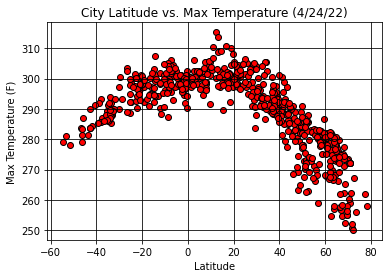

Temperatures appear to drop with increasing latitudes.


In [15]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="red")
plt.title("City Latitude vs. Max Temperature (4/24/22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="black")
plt.savefig("output_data/fig1.png")
plt.show()
print("Temperatures appear to drop with increasing latitudes.")

## Latitude vs. Humidity Plot

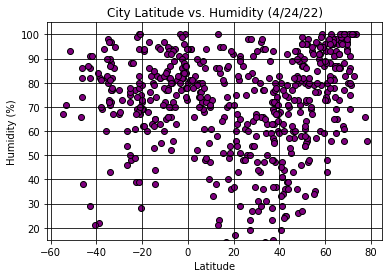

Humidity inreases at higher latitudes.


In [16]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="purple")
plt.title("City Latitude vs. Humidity (4/24/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="black")
plt.savefig("output_data/fig2.png")
plt.show()
print("Humidity inreases at higher latitudes.")

## Latitude vs. Cloudiness Plot

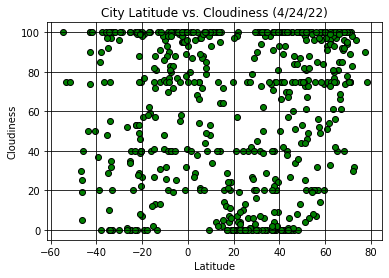

Cloudiness appears widely distributed across the varying latitudes.


In [17]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="green")
plt.title("City Latitude vs. Cloudiness (4/24/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="black")
plt.savefig("output_data/fig3.png")
plt.show()
print("Cloudiness appears widely distributed across the varying latitudes.")

## Latitude vs. Wind Speed Plot

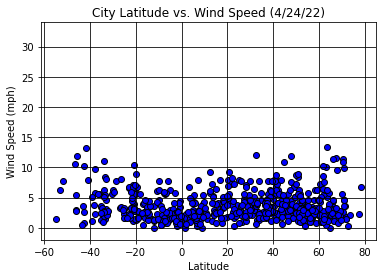

Wind speeds are widely ditributed at varying latitudes.


In [18]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Wind Speed (4/24/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="black")
plt.savefig("output_data/fig4.png")
plt.show()
print("Wind speeds are widely ditributed at varying latitudes.")

## Linear Regression

In [19]:
northern_hemisphere = weather_dataframe.loc[pd.to_numeric(weather_dataframe["Lat"]).astype(float) > 0, :]
southern_hemisphere = weather_dataframe.loc[pd.to_numeric(weather_dataframe["Lat"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -0.6x + 310.98
The r-squared is: -0.8646726466178026


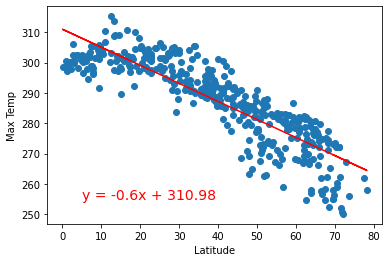

Temperatures in northern hemisphere decrease as latitude moves above zero.


In [20]:
x_values = pd.to_numeric(northern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemisphere['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"{line_eq}")

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(5,255),fontsize=14,color="red")

# Print r value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()
print("Temperatures in northern hemisphere decrease as latitude moves above zero.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.34x + 301.71
The r-squared is: 0.7456245657001849


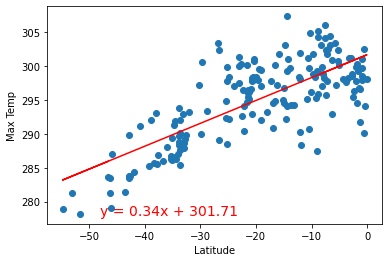

Temperatures in southern hemisphere increase as latitude moves closer zero.


In [21]:
x_values = pd.to_numeric(southern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemisphere['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"{line_eq}")

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(-48,278),fontsize=14,color="red")

# Print r value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()
print("Temperatures in southern hemisphere increase as latitude moves closer zero.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.39x + 52.99
The r-squared is: 0.3340314572983874


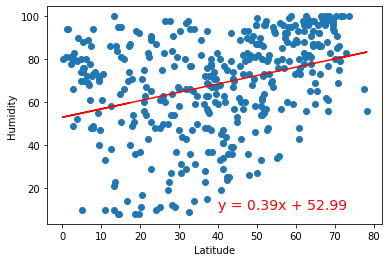

Humidity increases in northern hemisphere as latitude moves above zero.


In [22]:
x_values = pd.to_numeric(northern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemisphere['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"{line_eq}")

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(40,10),fontsize=14,color="red")

# Print r value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()
print("Humidity increases in northern hemisphere as latitude moves above zero.")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.22x + 80.14
The r-squared is: 0.18817309732185


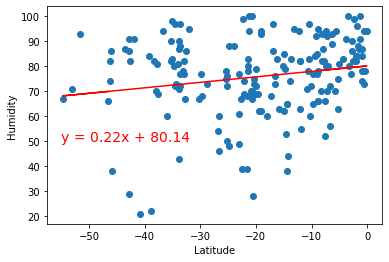

Humidity appears similar in southern hemisphere as latitude moves toward zero.


In [23]:
x_values = pd.to_numeric(southern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemisphere['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"{line_eq}")

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-55,50),fontsize=14,color="red")

# Print r value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()
print("Humidity appears similar in southern hemisphere as latitude moves toward zero.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.54x + 38.17
The r-squared is: 0.2873476585066557


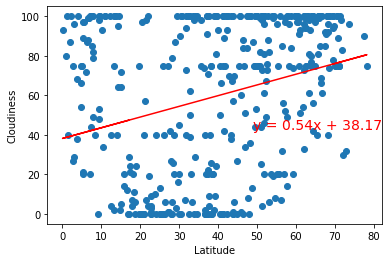

Cloudiness increases with higher latitudes in northern hemisphere.


In [24]:
x_values = pd.to_numeric(northern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemisphere['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"{line_eq}")

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(49,43),fontsize=14,color="red")

# Print r value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()
print("Cloudiness increases with higher latitudes in northern hemisphere.")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.51x + 72.87
The r-squared is: 0.1943201532223292


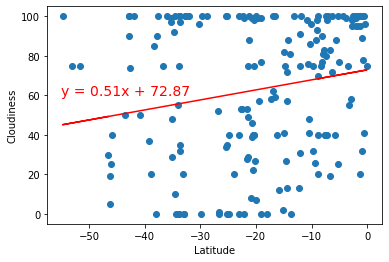

Cloudiness in the southern hemisphere decreases as latitude moves below zero.


In [25]:
x_values = pd.to_numeric(southern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemisphere['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"{line_eq}")

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-55,60),fontsize=14,color="red")

# Print r value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()
print("Cloudiness in the southern hemisphere decreases as latitude moves below zero.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.01x + 3.44
The r-squared is: 0.060372323897914866


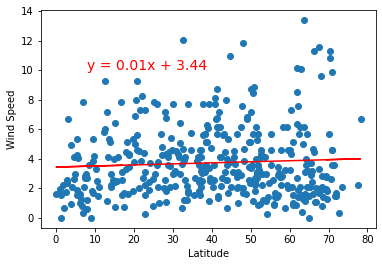

In northern hemisphere, wind speeds remains simiiar as latitude increases above zero.


In [26]:
x_values = pd.to_numeric(northern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemisphere['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"{line_eq}")

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(8,10),fontsize=14,color="red")

# Print r value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()
print("In northern hemisphere, wind speeds remains simiiar as latitude increases above zero.")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.07x + 2.19
The r-squared is: -0.3695170939683793


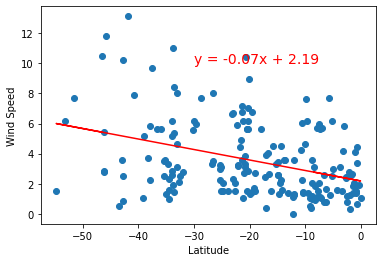

The wind speeds lower in southern hemisphere as latitude move closer to zero.


In [28]:
x_values = pd.to_numeric(southern_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemisphere['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"{line_eq}")

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-30,10),fontsize=14,color="red")

# Print r value
print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()
print("The wind speeds lower in southern hemisphere as latitude move closer to zero.")